# Sequenz Sangha/Ngoko-Gebiet

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Bauchige Gefäße der jüngeren Keramikgruppen am Sangha und Ngoko

Abfrage:

* Typ = Konda + Mandombe + Pandama

In [2]:
sql = """SELECT t_Obj.objID, 
        t_Obj.muendungsD, 
        t_Obj.minD, 
        t_Obj.maxD, 
        t_Obj.Form_Gef, 
        t_Obj.Typ, 
        t_Ort.ort_kurz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
             INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID
        WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) = 'MDB')
            OR ((t_Obj.Typ) = 'KON')
            OR ((t_Obj.Typ) = 'PDM'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,muendungsD,minD,maxD,Form_Gef,Typ,ort_kurz
0,479,,,,None,MDB,PIK
1,481,,,,None,MDB,PIK
2,484,,,,None,MDB,PIK
3,485,,,,None,MDB,PIK
4,486,,14,21,D1,MDB,PIK


In [3]:
df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df['MaxMin'] = df['maxD'] / df['minD']
df = pd.DataFrame(df)
display(df.head())

,objID,muendungsD,minD,maxD,Form_Gef,Typ,ort_kurz,MaxMin
0,479,NaN,NaN,NaN,None,MDB,PIK,NaN
1,481,NaN,NaN,NaN,None,MDB,PIK,NaN
2,484,NaN,NaN,NaN,None,MDB,PIK,NaN
3,485,NaN,NaN,NaN,None,MDB,PIK,NaN
4,486,NaN,14.0,21.0,D1,MDB,PIK,1.5


In [5]:
# Zeilen löschen, in denen MaxMin leer ist
#df1 = df.dropna(subset = df['MaxMin'])
df1 = df[np.isfinite(df['MaxMin'])]

In [6]:
# die eine Flasche objID 1184 entfernen
df1 = df1[df.objID != 1184]

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
df1 = df1.sort_index(by=['MaxMin'], ascending=[False])
display(df1.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,objID,muendungsD,minD,maxD,Form_Gef,Typ,ort_kurz,MaxMin
94,1253,NaN,9.5,27.0,D1,MDB,MDB,2.842105
138,2809,13.0,11.0,29.0,D1,MDB,PIK,2.636364
36,563,13.0,11.0,27.0,D1,MDB,PIK,2.454545
52,586,12.0,10.5,25.0,D1,MDB,PIK,2.380952
21,547,11.5,10.5,25.0,D1,MDB,PIK,2.380952


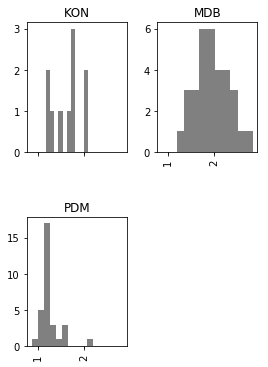

In [8]:
df1['MaxMin'].hist(by = df['Typ'], color = 'grey', histtype='stepfilled', figsize=(4, 6), sharex = True)
#plt.savefig('../output/4.2.2 SanghaNgoko - bauchige Gef 1.pdf')
plt.show()

In [10]:
#import pandas.tools.rplot as rplot

#plot = rplot.RPlot(df1, x='MaxMin')
#plot.add(rplot.TrellisGrid(['Typ', '.']))
#plot.add(rplot.GeomHistogram())
#plot.render(plt.gcf())

## Stilgruppen

In [2]:
sql = """SELECT t_Obj.objID,
            t_Ort.ort_name AS ort_kurz,
            t_Ort.ort_fluss,
            t_Ort."Kat-Nr",
            t_Obj.Typ
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID
        WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) Not Like '')
            AND ((t_Obj.Typ) Not Like '%/%')
            AND ((t_Obj.Typ) Not Like '%(?)%')
            AND (((t_Ort.ort_fluss) Like '%Sangha%')
            OR ((t_Ort.ort_fluss) Like '%Ngoko%')))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['STIL'] = df['Typ']

stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv")
stilgr['STILGR'] = stilgr['Seidensticker'] + ' ' + stilgr['Stilgruppe']

# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']

df = df.replace({"Typ": di})

a = df['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

df = pd.concat([df, b], axis = 1)

df = df.replace('', np.nan, regex=True)
sicher = df[pd.notnull(df['Typ'])]

sicher.head()

,objID,ort_kurz,ort_fluss,Kat-Nr,Typ,STIL,0,1,2,3
0,458,Ngombe,Sangha,252,4.2.2.3 Ngombe,NGO,4,2.0,2.0,3.0
1,475,Pikunda,Sangha,255,4.2.2.1 Pikunda-Munda,PKM,4,2.0,2.0,1.0
2,476,Pikunda,Sangha,255,4.2.2.1 Pikunda-Munda,PKM,4,2.0,2.0,1.0
3,477,Pikunda,Sangha,255,4.2.2.1 Pikunda-Munda,PKM,4,2.0,2.0,1.0
4,478,Pikunda,Sangha,255,4.2.2.1 Pikunda-Munda,PKM,4,2.0,2.0,1.0


In [3]:
df_pivot = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], columns = [1, 2, 3, 'STIL'], aggfunc = len)
df_pivot = df_pivot.sort_index(ascending=[False])
display(df_pivot.head())

1                 2.0                                                         \
2                 1.0  2.0                                                     
3                2.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0   
STIL              NGB  PKM  BOG  NGO  MAT  EBA  EPE  MKA  MDB  KON  OUE  PDM   
Kat-Nr ort_kurz                                                                
281    Ngama      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  NaN  3.0   
280    Ponga      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
279    Bonga      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0   
278    Ngwangala  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
277    Mbenja     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  NaN  1.0   

1                           3.0                 
2                           1.0                 
3                12.0 13.0 1.0  2.0  3.0  4.0   
STIL              MBJ  BBS  IMB  BDG  MBA  BOT  
Kat-Nr ort_kurz                                 
281    Ngama      9.0  NaN  NaN  NaN  NaN  NaN  
280    Ponga      NaN  NaN  NaN  NaN  NaN  NaN  
279    Bonga      2.0  NaN  NaN  NaN  NaN  NaN  
278    Ngwangala  3.0  NaN  NaN  NaN  NaN  NaN  
277    Mbenja     2.0  NaN  NaN  NaN  NaN  NaN

In [4]:
# Tabelle nur mit den fraglichen Stücken

sql = """SELECT t_Obj.objID,
            t_Ort.ort_name AS ort_kurz,
            t_Ort.ort_fluss,
            t_Ort."Kat-Nr",
            t_Obj.Typ
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID
        WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) Like '%/%')
            OR ((t_Obj.Typ) Like '%(?)%')
            AND (((t_Ort.ort_fluss) Like '%Sangha%')
            OR ((t_Ort.ort_fluss) Like '%Ngoko%')))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Kat-Nr'] = pd.to_numeric(df['Kat-Nr'])

df = df[df['Kat-Nr'] > 233]
df = df[df['Kat-Nr'] <= 282]

# (?) und alles nach / weg
df['Typ'] = df['Typ'].map(lambda x: x.rstrip(' (?)'))
df['Typ'] = df['Typ'].apply(lambda x: x.split('/')[0])

df['STIL'] = df['Typ']

df = df.replace({"Typ": di})

a = df['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

df = pd.concat([df, b], axis = 1)

df_pivot = df.pivot_table(values = 'objID', index = 'Kat-Nr', columns = ['Typ', 'STIL'], aggfunc = len, fill_value=0)
df_pivot = df_pivot.sort_index(ascending=[False])

fragl = df_pivot

fragl[fragl != 0] = 0.5
fragl = fragl.unstack().reset_index()
fragl.head()

,Typ,STIL,Kat-Nr,0
0,4.2.1.2 Ngbanja,NGB,235.0,0.0
1,4.2.1.2 Ngbanja,NGB,236.0,0.0
2,4.2.1.2 Ngbanja,NGB,237.0,0.0
3,4.2.1.2 Ngbanja,NGB,238.0,0.0
4,4.2.1.2 Ngbanja,NGB,239.0,0.0


In [5]:
len(fragl)

612

In [6]:
df_pivot = sicher.pivot_table(values = 'objID', index = 'Kat-Nr', columns = ['Typ', 'STIL'], aggfunc = len, fill_value=0)
df_pivot = df_pivot.sort_index(ascending=[False])
sicherPiv = df_pivot

sicherPiv[sicherPiv != 0] = 1
sicherPiv = sicherPiv.unstack().reset_index()
sicherPiv.head()

,Typ,STIL,Kat-Nr,0
0,4.2.1.2 Ngbanja,NGB,238,0
1,4.2.1.2 Ngbanja,NGB,239,0
2,4.2.1.2 Ngbanja,NGB,240,0
3,4.2.1.2 Ngbanja,NGB,241,0
4,4.2.1.2 Ngbanja,NGB,242,0


In [7]:
len(sicherPiv)

666

In [8]:
styles = sicherPiv.append(fragl, ignore_index = True)
styles['Kat-Nr'] = pd.to_numeric(styles['Kat-Nr'])
styles = styles.rename(columns={0:'Val'})
styles.head()

,Typ,STIL,Kat-Nr,Val
0,4.2.1.2 Ngbanja,NGB,238.0,0.0
1,4.2.1.2 Ngbanja,NGB,239.0,0.0
2,4.2.1.2 Ngbanja,NGB,240.0,0.0
3,4.2.1.2 Ngbanja,NGB,241.0,0.0
4,4.2.1.2 Ngbanja,NGB,242.0,0.0


In [9]:
len(styles)

1278

In [10]:
a = styles['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

styles = pd.concat([styles, b], axis = 1)

In [11]:
orte = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], aggfunc = len)
orte = orte.reset_index()

styles = pd.merge(styles, orte, on='Kat-Nr', how='left')

In [12]:
stylesPiv = styles.pivot_table(values = 'Val', index = ['Kat-Nr', 'ort_kurz'], columns = [1, 2, 3, 'STIL'], aggfunc = sum, fill_value=0)
stylesPiv = stylesPiv.sort_index(ascending=[False])
stylesPiv[stylesPiv == 0] = '-'
stylesPiv[stylesPiv == 1.5] = "$\\bullet $"
stylesPiv[stylesPiv == 1.0] = "$\\bullet $"
stylesPiv[stylesPiv == 0.5] = "$\circ $"
stylesPiv.reset_index().to_latex('../output/tabs/4-2-1_Sangha-Ngoko-Gebiet_Sequenz.tex',
                                 index = False, escape = False, encoding='utf-8')
stylesPiv

1                                     2                                      \
2                                     1           2                           
3                                    2           1           2           3    
STIL                                NGB         PKM         BOG         NGO   
Kat-Nr ort_kurz                                                               
281.0  Ngama                          -           -           -           -   
277.0  Mbenja                         -           -           -           -   
276.0  Pandama               $\bullet $           -           -           -   
275.0  Ngoko Fkm 17 (Elali)           -           -           -           -   
274.0  Bomasa                         -           -           -           -   
273.0  Sakao                          -           -           -           -   
272.0  Bonda                          -           -           -           -   
271.0  Mai impembe                    -           -           -           -   
270.0  Gbagbale                       -           -           -           -   
269.0  Leme                           -           -           -           -   
268.0  Konda                          -           -           -           -   
267.0  Maboko                         -           -           -           -   
266.0  Gatongo                        -           -           -           -   
265.0  Ouesso                $\bullet $           -           -           -   
264.0  Matoto                $\bullet $           -           -           -   
263.0  Sangha Fkm 428                 -           -           -           -   
262.0  Mosanya                 $\circ $  $\bullet $           -           -   
261.0  Motoli                         -           -           -           -   
260.0  Ikelemba                $\circ $  $\bullet $           -           -   
259.0  Mandombe                       -    $\circ $           -    $\circ $   
258.0  Molanda                        -    $\circ $           -           -   
256.0  Itandi                         -  $\bullet $           -           -   
255.0  Pikunda               $\bullet $  $\bullet $  $\bullet $           -   
253.0  Ifondo                         -    $\circ $           -           -   
251.0  Mitula                         -  $\bullet $           -           -   
250.0  Bokonongo                      -    $\circ $  $\bullet $  $\bullet $   
249.0  Inyenge                        -           -           -  $\bullet $   
248.0  Loboko                         -           -  $\bullet $    $\circ $   
244.0  Sangha Fkm 85                  -           -           -           -   
243.0  Monjolomba                     -    $\circ $           -  $\bullet $   
241.0  Sosolo                         -    $\circ $  $\bullet $  $\bullet $   
239.0  Bobusa                         -    $\circ $           -           -   
238.0  Bonga                          -           -           -           -   
237.0  Gombe                          -           -           -           -   
236.0  Sungu                          -           -           -           -   
235.0  Maberu                         -    $\circ $           -           -   

1                                                                            \
2                                                                             
3                                    4           5           6           7    
STIL                                MAT         EBA         EPE         MKA   
Kat-Nr ort_kurz                                                               
281.0  Ngama                          -           -           -           -   
277.0  Mbenja                         -    $\circ $           -           -   
276.0  Pandama                        -           -           -           -   
275.0  Ngoko Fkm 17 (Elali)           -           -           -           -   
274.0  Bomasa                         -          

## Gillet 2013

In [24]:
spe = pd.read_csv("../lit/Gillet2013_obj.csv")

spe = spe[pd.notnull(spe['StilGr'])] # alle unbekannten Stücke weg
spe['StilGr'] = spe['StilGr'].map(lambda x: x.rstrip(' (?)')) # (?) weg
spe

,obj,site,feature,depth,StilGr
0,37,P1,F2,0.0,MBJ
2,39,P1,F1,0.2,PDM
3,40a,P1,F1,0.3,OUE
4,40b,P1,F1,0.3,OUE
5,40c,P1,F1,0.3,OUE
6,41,P1,F1,0.4,PKM
7,42,P1,F3,0.5,MDB
10,45,P3,F5,0.6,PKM
11,46,P3,F5,0.6,PKM
12,47,P2,F4,0.4,PKM


In [25]:
env = pd.read_csv("../lit/Gillet2013_sites.csv", decimal=',')
env

,site,N,E,Name
0,P1,1.448,16.211,Mboua Mboua/P1
1,P2,1.222,16.838,Ibamba/P2
2,P3,2.052,16.376,P3
3,P4,2.014,16.395,P4
4,P5,2.151,16.177,P5


In [26]:
df = pd.merge(left = spe, right = env, on = 'site')
df_pivot = df.pivot_table(values='obj', index=['site', 'N', 'E'], columns='StilGr', aggfunc=len, fill_value='')
df_pivot

,,StilGr,MBJ,MDB,OUE,PDM,PKM
site,N,E,,,,,
P1,1.448,16.211,1,1,3,1,1
P2,1.222,16.838,,,,,1
P3,2.052,16.376,,,,,2
P4,2.014,16.395,,,,,1
